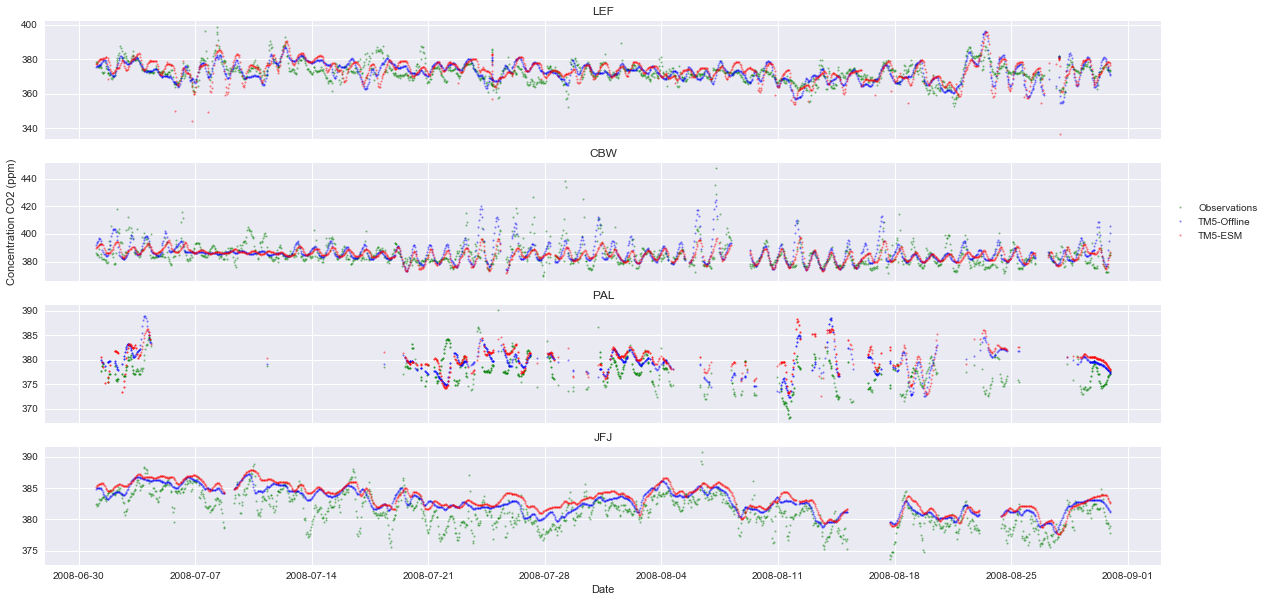

In [12]:
#1. TIME SERIES PLOT FOR SELECTED STATIONS
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017/'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)
#Select the timeframe to make the plots
df = df[(df.G_date>'2008-07-01') & (df.G_date<'2008-08-31')]

CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) & (df.D_alt>150) & (df.D_alt<200)#Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland
#print(df[JFJ])

f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, sharex=True,figsize=(20, 10))
size = 2
alpha=.5
mask = LEF
ax1.set_title('LEF')
ax1.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

mask=CBW
ax2.set_title('CBW')
ax2.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax2.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax2.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

mask=PAL
ax3.set_title('PAL')
ax3.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax3.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax3.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

mask=JFJ
ax4.set_title('JFJ')
ax4.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax4.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax4.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set(ylabel='Concentration CO2 (ppm)')
ax4.set(xlabel='Date')
plt.savefig('timeseries_jul-aug_newmeteo.png')
plt.show()

In [11]:
#2. TIME SERIES PLOT FOR SELECTED STATIONS with errorbars - errorbars very small due to the very similar ensemble members
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = knmipath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fmp_obs1 = []
fmp_obs2 = []
fmp_obs3 = []
fmp_obs4 = []
fmp_obs5 = []
fmp_obs6 = []
fmp_obs7 = []
fmp_obs8 = []
fmp_obs9 = []

fesm_obs0 = []
fesm_obs1 = []
fesm_obs2 = []
fesm_obs3 = []
fesm_obs4 = []
fesm_obs5 = []
fesm_obs6 = []
fesm_obs7 = []
fesm_obs8 = []
fesm_obs9 = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fmp_obs1 = np.append(fmp_obs1,flask_mp_fh.variables['flask'][:x,1])
            fmp_obs2 = np.append(fmp_obs2,flask_mp_fh.variables['flask'][:x,2])
            fmp_obs3 = np.append(fmp_obs3,flask_mp_fh.variables['flask'][:x,3])
            fmp_obs4 = np.append(fmp_obs4,flask_mp_fh.variables['flask'][:x,4])
            fmp_obs5 = np.append(fmp_obs5,flask_mp_fh.variables['flask'][:x,5])
            fmp_obs6 = np.append(fmp_obs6,flask_mp_fh.variables['flask'][:x,6])
            fmp_obs7 = np.append(fmp_obs7,flask_mp_fh.variables['flask'][:x,7])
            fmp_obs8 = np.append(fmp_obs8,flask_mp_fh.variables['flask'][:x,8])
            fmp_obs9 = np.append(fmp_obs9,flask_mp_fh.variables['flask'][:x,9])
            
            fesm_obs0 = np.append(fesm_obs0,flask_esm_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs1 = np.append(fesm_obs1,flask_esm_fh.variables['flask'][:x,1])
            fesm_obs2 = np.append(fesm_obs2,flask_esm_fh.variables['flask'][:x,2])
            fesm_obs3 = np.append(fesm_obs3,flask_esm_fh.variables['flask'][:x,3])
            fesm_obs4 = np.append(fesm_obs4,flask_esm_fh.variables['flask'][:x,4])
            fesm_obs5 = np.append(fesm_obs5,flask_esm_fh.variables['flask'][:x,5])
            fesm_obs6 = np.append(fesm_obs6,flask_esm_fh.variables['flask'][:x,6])
            fesm_obs7 = np.append(fesm_obs7,flask_esm_fh.variables['flask'][:x,7])
            fesm_obs8 = np.append(fesm_obs8,flask_esm_fh.variables['flask'][:x,8])
            fesm_obs9 = np.append(fesm_obs9,flask_esm_fh.variables['flask'][:x,9])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()
            

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs0*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)

ensemble = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                        'mp0' : fmp_obs0*1000000,
                        'mp1' : fmp_obs1*1000000,
                        'mp2' : fmp_obs2*1000000,
                        'mp3' : fmp_obs3*1000000,
                        'mp4' : fmp_obs4*1000000,
                        'mp5' : fmp_obs5*1000000,
                        'mp6' : fmp_obs6*1000000,
                        'mp7' : fmp_obs7*1000000,
                        'mp8' : fmp_obs8*1000000,
                        'mp9' : fmp_obs9*1000000,
                        'esm0' : fesm_obs0*1000000,
                        'esm1' : fesm_obs1*1000000,
                        'esm2' : fesm_obs2*1000000,
                        'esm3' : fesm_obs3*1000000,
                        'esm4' : fesm_obs4*1000000,
                        'esm5' : fesm_obs5*1000000,
                        'esm6' : fesm_obs6*1000000,
                        'esm7' : fesm_obs7*1000000,
                        'esm8' : fesm_obs8*1000000,
                        'esm9' : fesm_obs9*1000000,
                        'D_alt'     : alt,
                        'E_lat'     : lat,
                        'F_lon'     : lon,
                        'G_date'    : time},index=obs_num)
                  

CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) #Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland

CBW = (ensemble.E_lat>51) & (ensemble.E_lat<52) & (ensemble.F_lon>4) & (ensemble.F_lon<5) #Cabauw in the Netherlands
PAL = (ensemble.E_lat>67) & (ensemble.E_lat<68) & (ensemble.F_lon>24) & (ensemble.F_lon<25) #PALLAS in Finland
mask = CBW

ensemble = ensemble[mask]
#print(fmp.duplicated('G_date'))
#print(df[JFJ])
sns.tsplot(ensemble.A_fin_obs, color='g',alpha=.2)
sns.tsplot([ensemble.mp0,ensemble.mp1,ensemble.mp2,ensemble.mp3,ensemble.mp4,ensemble.mp5,
            ensemble.mp6,ensemble.mp7,ensemble.mp8,ensemble.mp9],color='b',alpha=.2)
sns.tsplot([ensemble.esm0,ensemble.esm1,ensemble.esm2,ensemble.esm3,ensemble.esm4,ensemble.esm5,
            ensemble.esm6,ensemble.esm7,ensemble.esm8,ensemble.esm9],color='r',alpha=.2)
plt.show()

<bound method NDFrame.head of           A_fin_obs   B_fmp_obs  C_fesm_obs  D_alt      E_lat    F_lon  \
24908.0  409.310014  420.544267  505.697331  990.0  47.801102  11.0245   

                     G_date  
24908.0 2009-01-07 11:55:00  >


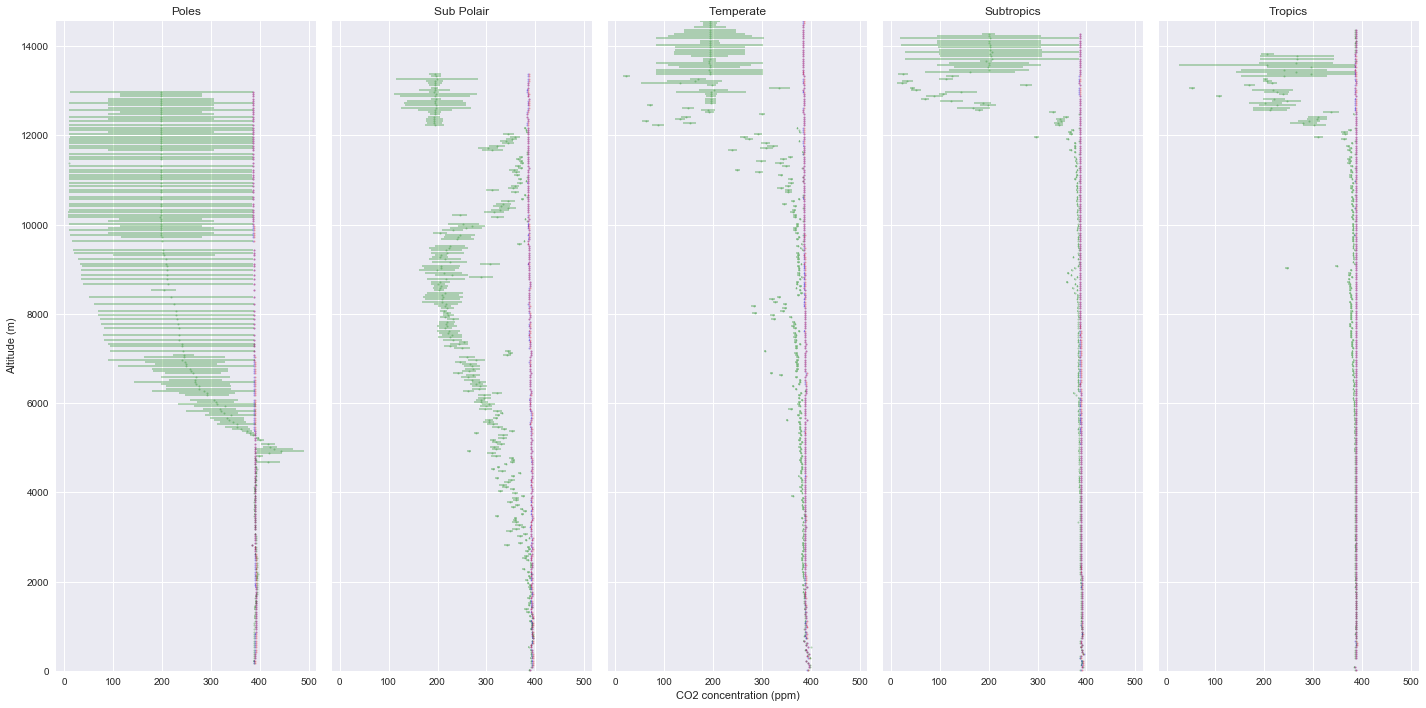

In [102]:
#3. Altitude plots
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)


CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) #Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200) #Global mask to view all the data

POL = (df.E_lat>80) & (df.E_lat<100) & (df.A_fin_obs <500)| (df.E_lat<-80) & (df.E_lat>=-100) & (df.A_fin_obs <500)   # Poles
SUBPOL = (df.E_lat>60) & (df.E_lat<=80) & (df.A_fin_obs <500) | (df.E_lat<-60) & (df.E_lat>=-80) & (df.A_fin_obs <500) # Subpolair areas
TEM = (df.E_lat>40) & (df.E_lat<=60) & (df.A_fin_obs <500) | (df.E_lat<-40) & (df.E_lat>=-60) & (df.A_fin_obs <500)    # Temperate zones
SUBTRO = (df.E_lat>20) & (df.E_lat<=40) & (df.A_fin_obs <500) | (df.E_lat<-20) & (df.E_lat>=-40) & (df.A_fin_obs <500) # Subtropics
TRO = (df.E_lat>-20) & (df.E_lat<=20) & (df.A_fin_obs <500)                                      # Tropics

HIGH = (df.C_fesm_obs>500) 
print(df[HIGH].head)

f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(20, 10))
size = 2
alpha=.3
mask = POL

# df['A_fin_obs'] = df['A_fin_obs']*1000000
# df['B_fmp_obs'] = df['B_fmp_obs']*1000000
# df['C_fesm_obs'] = df['C_fesm_obs']*1000000


#sys.exit()


#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax1.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax1.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax1.set_title("Poles")
#plt.xlim(380,420)
plt.ylim(0,max(df.D_alt))

mask = SUBPOL
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax2.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax2.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax2.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax2.set_title("Sub Polair")
mask = TEM
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax3.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax3.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax3.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax3.set_title("Temperate")
mask = SUBTRO
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax4.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax4.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax4.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax4.set_title("Subtropics")
mask = TRO
#Groups A_fin_obs by the altitude. The altitude is aggregated for each 50m and several statistics are done on each altitude value
alt_fin_obs = df[mask]['A_fin_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
#standard error of the mean is calculated by dividing the standard deviation by the square root of the number of measurements
alt_fin_obs['error']= alt_fin_obs['std']/np.sqrt(alt_fin_obs['count'])

alt_fmp_obs = df[mask]['B_fmp_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fmp_obs['error']= alt_fmp_obs['std']/np.sqrt(alt_fmp_obs['count'])

alt_fesm_obs = df[mask]['C_fesm_obs'].groupby(pd.cut(df[mask]['D_alt'], np.arange(0, df[mask]['D_alt'].max()+50, 50))).agg({'mean':np.mean,
                                                                                                 'count':"count",
                                                                                                 'std':np.std})
alt_fesm_obs['error']= alt_fesm_obs['std']/np.sqrt(alt_fesm_obs['count'])
alt = np.arange(25,df[mask]['D_alt'].max()+25, 50)
ax5.errorbar(alt_fin_obs['mean'], alt,xerr=alt_fin_obs['error'], fmt='o', color = 'g', alpha=alpha, ms=size,label='Observations')
ax5.errorbar(alt_fmp_obs['mean'], alt,xerr=alt_fmp_obs['error'], fmt='o', color = 'b', alpha=alpha, ms=size, label='TM5-Offline')
ax5.errorbar(alt_fesm_obs['mean'], alt,xerr=alt_fesm_obs['error'], fmt='o', color = 'r', alpha=alpha, ms=size, label='TM5-ESM')
ax5.set_title("Tropics")

ax1.set(ylabel='Altitude (m)')
ax3.set(xlabel='CO2 concentration (ppm)')
plt.tight_layout()
plt.show()

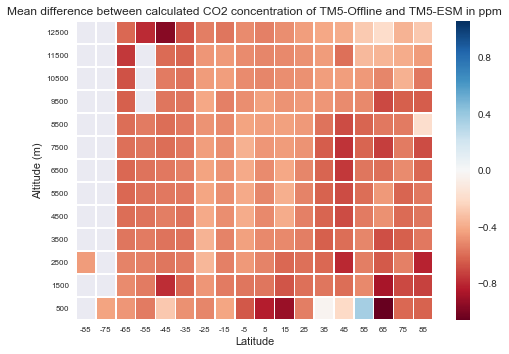

In [10]:
#4. latitude heatmap
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)
df = df[df.A_fin_obs<500]
#Difference between TM5-Offline and TM5-ESM, positive means TM5-Offline is larger.
df['H_diff_models'] = df['B_fmp_obs']-df['C_fesm_obs']
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200) #Global mask to view all the data
mask=GLOB

# lat_fin_obs = df[mask]['A_fin_obs'].groupby([pd.cut(df[mask]['E_lat'],np.arange(-90,100,10)),pd.cut(df[mask]['D_alt'],np.arange(0,13000,1000))]).agg({'mean':np.mean,
#                                                                                                  'count':"count",
#                                                                                                  'std':np.std})
# Calculate the mean of all the values that fit in the numpy array boxes and use the unstack function to get rid of the multi-index dataframe
lat_fin_obs_mean = df[mask]['A_fin_obs'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                  pd.cut(df[mask]['E_lat'],np.arange(-90,100,20))]).agg({'mean':np.mean}).unstack()
lat_fmp_obs_mean = df[mask]['B_fmp_obs'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                  pd.cut(df[mask]['E_lat'],np.arange(-90,100,20))]).agg({'mean':np.mean}).unstack()
lat_fesm_obs_mean = df[mask]['C_fesm_obs'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,20))]).agg({'mean':np.mean}).unstack()
lat_diff_obs_mean = df[mask]['H_diff_models'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                    pd.cut(df[mask]['E_lat'],np.arange(-90,100,10))]).agg({'mean':np.mean}).unstack()

# Do the same for the min and max, subtract them and unstack the resulting difference column.
lat_fin_obs_amp = df[mask]['A_fin_obs'].groupby([pd.cut(df[mask]['D_alt'],np.arange(0,14000,1000)),
                                                  pd.cut(df[mask]['E_lat'],np.arange(-90,100,20))]).agg({'max':np.max,'min':np.min})
lat_fin_obs_amp['diff']=lat_fin_obs_amp['max']-lat_fin_obs_amp['min']
lat_fin_obs_amp = lat_fin_obs_amp['diff'].unstack()

# invert the altitude axis
lat_fin_obs_mean = lat_fin_obs_mean.reindex(index=lat_fin_obs_mean.index[::-1])
lat_fmp_obs_mean = lat_fmp_obs_mean.reindex(index=lat_fmp_obs_mean.index[::-1])
lat_fesm_obs_mean = lat_fesm_obs_mean.reindex(index=lat_fesm_obs_mean.index[::-1])
lat_diff_obs_mean = lat_diff_obs_mean.reindex(index=lat_diff_obs_mean.index[::-1])

lat_fin_obs_amp = lat_fin_obs_amp.reindex(index=lat_fin_obs_diff.index[::-1])

alt_index = np.arange(12500,-500,-1000)
lat_index = np.arange(-85,95,10)

f, (ax1) = plt.subplots(1, 1)
ax1 = sns.heatmap(lat_diff_obs_mean,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="RdBu")    
ax1.set(xlabel='Latitude', ylabel='Altitude (m)',title='Mean difference between calculated CO2 concentration of TM5-Offline and TM5-ESM in ppm')
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(8)
plt.show()
# ax2 = sns.heatmap(lat_fmp_obs-lat_fin_obs,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="YlGnBu")    
# ax2.set(xlabel='Latitude', ylabel='Altitude (m)',title='TM5-Offline CO2 concentrations in ppm')
    
# ax3 = sns.heatmap(lat_fesm_obs-lat_fin_obs,xticklabels=lat_index,yticklabels=alt_index, linewidths=.5, cmap="YlGnBu")    
# ax3.set(xlabel='Latitude', ylabel='Altitude (m)',title='TM5-ECE CO2 concentrations in ppm')

# plt.show()


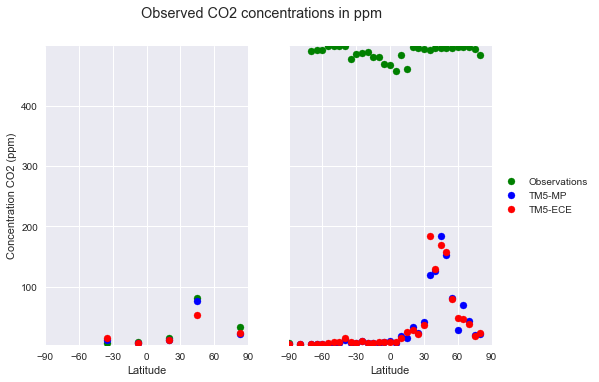

In [19]:
#5. amplitude - latitude plot
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print 'flask_output_TM5_MP_'+file[19:]            
            #print 'flask_output_ECE_'+file[19:]
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time},index=obs_num)
df = df[df.A_fin_obs<500]

MLO = (df.E_lat>19) & (df.E_lat<20) & (df.F_lon>-155) & (df.F_lon<-154) #Mauna Loa, Hawai, US
ALT = (df.E_lat>82) & (df.E_lat<83) & (df.F_lon>-63) & (df.F_lon<-62) #Alert, Alaska, US
ASC = (df.E_lat>-8) & (df.E_lat<-7) & (df.F_lon>-15) & (df.F_lon<-14) #Ascencion Island (Middle Atlantic)
AMT = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-69) & (df.F_lon<-68) #Argyle, Maine, US
CPT = (df.E_lat>-36) & (df.E_lat<-35) & (df.F_lon>18) & (df.F_lon<19) #Cape Town, South Africa
GLOB= (df.E_lat>-200) & (df.E_lat<200) & (df.F_lon>-200) & (df.F_lon<200) #Global mask to view all the data
masks = [MLO,ALT,ASC,AMT,CPT]

#For stations: empty arrays, filled with the difference between the min and the max value at each location. The 'lat' array
#consists of the latitude of the station
fin_diff = []
fmp_diff = []
fesm_diff = []
lat = []
for mask in masks:
    fin_diff=np.append(fin_diff,(df[mask]['A_fin_obs'].max()-df[mask]['A_fin_obs'].min()))
    fmp_diff=np.append(fmp_diff,(df[mask]['B_fmp_obs'].max()-df[mask]['B_fmp_obs'].min()))
    fesm_diff=np.append(fesm_diff,(df[mask]['C_fesm_obs'].max()-df[mask]['C_fesm_obs'].min()))
    lat =  np.append(lat,df[mask]['E_lat'].max())

                                                                                               
# Calculate some statistics of all the values that fit in the numpy array boxes and calculate the amplitude of the timeseries
lat_fin_obs = df['A_fin_obs'].groupby(pd.cut(df['E_lat'],np.arange(-90,95,5))).agg({'mean':np.mean,'min':np.min,'max':np.max})
lat_fin_obs['diff'] = lat_fin_obs['max']-lat_fin_obs['min']

lat_fmp_obs = df['B_fmp_obs'].groupby(pd.cut(df['E_lat'],np.arange(-90,95,5))).agg({'mean':np.mean,'min':np.min,'max':np.max})
lat_fmp_obs['diff'] = lat_fmp_obs['max']-lat_fmp_obs['min']

lat_fesm_obs = df['C_fesm_obs'].groupby(pd.cut(df['E_lat'],np.arange(-90,95,5))).agg({'mean':np.mean,'min':np.min,'max':np.max})
lat_fesm_obs['diff'] = lat_fesm_obs['max']-lat_fesm_obs['min']

f, (ax1,ax2) = plt.subplots(1, 2,sharey=True,sharex=True)
plt.suptitle('Observed CO2 concentrations in ppm')
size = 2
alpha=.3

ax1.scatter(lat,fin_diff,color='g', label='Observations')
ax1.scatter(lat,fmp_diff,color='b', label='TM5-MP')
ax1.scatter(lat,fesm_diff,color='r', label='TM5-ECE')
ax2.scatter(np.arange(-90,90,5),lat_fin_obs['diff'],color='g', label='Observations')
ax2.scatter(np.arange(-90,90,5),lat_fmp_obs['diff'],color='b', label='TM5-MP')
ax2.scatter(np.arange(-90,90,5),lat_fesm_obs['diff'],color='r', label='TM5-ECE')
ax1.set(xlabel='Latitude', ylabel='Concentration CO2 (ppm)')
ax2.set(xlabel='Latitude')

plt.ylim(np.min(lat_fin_obs['diff']),np.max(lat_fin_obs['diff']))
plt.xlim(-90,90)
plt.xticks(np.arange(-90, 90+30, 30))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

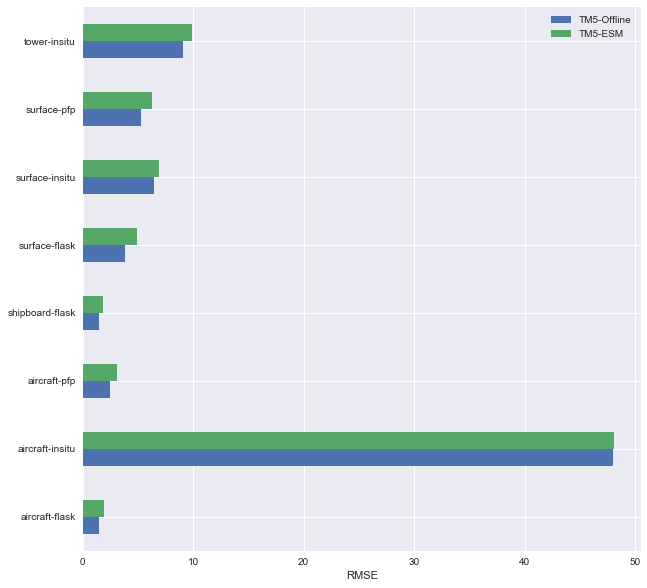

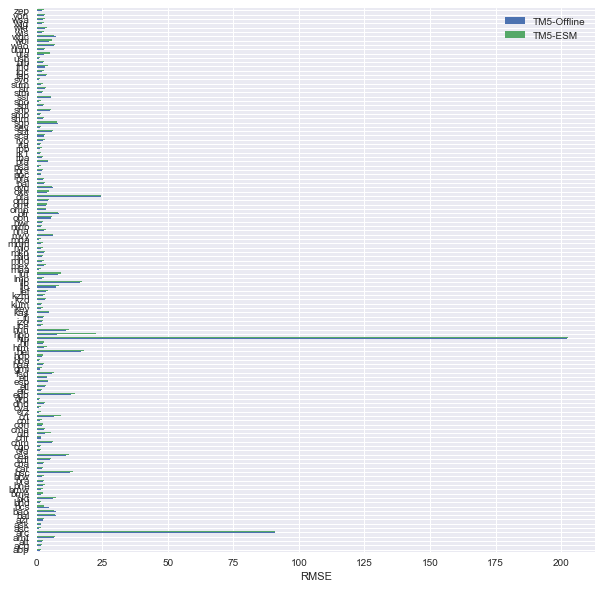

In [103]:
#6 Bar charts with the RMSE of the different stations and different type. 
#  Code extension allows to easily switch the timeseries graph for any chosen station.
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017/'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
#        if file.startswith('sample_coordinates_2007110300_2007111000.nc'):
        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc},index=obs_num)

#Select the timeframe to make the plots
#df = df[(df.G_date>'2008-07-01') & (df.G_date<'2008-08-31')]

CBW = (df.E_lat>51) & (df.E_lat<52) & (df.F_lon>4) & (df.F_lon<5) & (df.D_alt>150) & (df.D_alt<200)#Cabauw in the Netherlands
PAL = (df.E_lat>67) & (df.E_lat<68) & (df.F_lon>24) & (df.F_lon<25) #PALLAS in Finland
LEF = (df.E_lat>45) & (df.E_lat<46) & (df.F_lon>-91) & (df.F_lon<-90) #Park Falls in Wisconsin (USA)
JFJ = (df.E_lat>46) & (df.E_lat<47) & (df.F_lon>7) & (df.F_lon<8) #Jungfraujoch in Switserland

# print(df['H_obs_id'].value_counts())
# print(df['I_obs_loc'].value_counts())

#print(df['I_obs_loc'].value_counts())
#print(df[CBW])
#print(df[PAL]['H_obs_id'].value_counts())
#print(df[LEF]['H_obs_id'].value_counts())
#print(df[JFJ]['H_obs_id'].value_counts())

#remove values with too high observations
df = df[df.A_fin_obs<500]
#calculate difference between models and observations and square it
df['J_TM5_offline'] = (df['B_fmp_obs']-df['A_fin_obs'])**2
df['K_TM5_ESM'] = (df['C_fesm_obs']-df['A_fin_obs'])**2

#calculation of RMSE for the types of measurements
#group the difference(column-J) by type and give the mean and the count, two dataframes, Offline and ESM
sample_type_off = df['J_TM5_offline'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
sample_type_esm = df['K_TM5_ESM'].groupby(df['H_obs_id']).agg({'mean':np.mean,'count':"count"})
#Merge the two dataframes together
pieces_type = [sample_type_off,sample_type_esm]
sample_type=pd.concat(pieces_type,keys=['TM5-Offline','TM5-ESM'])
#Calculate the RMSE by giving the sqrt of the mean (mean was the square of the differences for each type)
sample_type['RMSE']=np.sqrt(sample_type['mean'])

#calculation of RMSE of the different locations of measurement, see above for method
#Use only stations with 10 or more measurements
count_loc = df['I_obs_loc'].value_counts()
count_loc[count_loc > 9]
df_loc = df[df['I_obs_loc'].isin(count_loc[count_loc > 9].index)]
sample_loc_off = df_loc['J_TM5_offline'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
sample_loc_esm = df_loc['K_TM5_ESM'].groupby(df_loc['I_obs_loc']).agg({'mean':np.mean,'count':"count"})
pieces_loc = [sample_loc_off,sample_loc_esm]
sample_loc=pd.concat(pieces_loc,keys=['TM5-Offline','TM5-ESM'])
sample_loc['RMSE']=np.sqrt(sample_loc['mean'])


#Plot the dataframes in barplots. First unstack them, keeping only the RMSE
plot_type=sample_type['RMSE'].unstack(level=0)
plot_type.index.name = '' #Setting the index name to '', otherwise the name is printed as label
ax1 = plot_type.plot.barh(figsize=(10,10))
plot_loc=sample_loc['RMSE'].unstack(level=0)
plot_loc.index.name = ''
ax2 = plot_loc.plot.barh(figsize=(10,10))
ax1.set_xlabel("RMSE")
ax2.set_xlabel("RMSE")
plt.show()

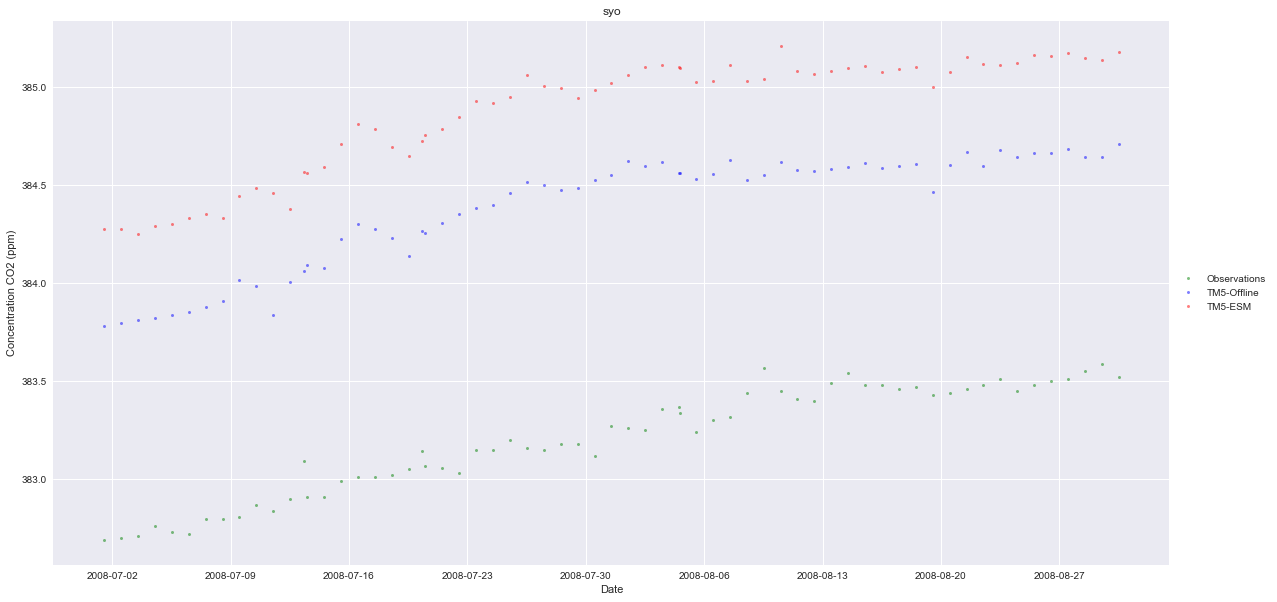

            A_fin_obs   B_fmp_obs  C_fesm_obs   D_alt      E_lat       F_lon  \
1508367.0  381.640013  386.316242  385.599327  1884.0  40.049999 -105.003998   
1508368.0  383.109989  386.015920  386.696280  1884.0  40.049999 -105.003998   
1508369.0  382.600003  385.947613  387.072767  1884.0  40.049999 -105.003998   
1508370.0  382.880011  386.353262  387.394335  1884.0  40.049999 -105.003998   
1508371.0  385.499996  387.285399  387.720036  1884.0  40.049999 -105.003998   
1508372.0  388.910004  388.818531  388.090324  1884.0  40.049999 -105.003998   
1508373.0  388.020009  390.821049  388.609071  1884.0  40.049999 -105.003998   
1508374.0  386.920001  393.306225  389.352557  1884.0  40.049999 -105.003998   
1508375.0  385.919993  396.779476  390.389905  1884.0  40.049999 -105.003998   
1508376.0  387.229986  401.986530  391.770329  1884.0  40.049999 -105.003998   
1508377.0  389.480003  409.260800  393.571390  1884.0  40.049999 -105.003998   
1508378.0  391.600013  415.572431  395.2

In [23]:
# Timeseries of chosen plot (comparable to figure 1), uses the data calculated by the previous block. 
# Can afterwards be run multiple times for chosen stations
f, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(20, 10))
size = 3
alpha=.5
mask_loc = 'syo'
mask = (df.I_obs_loc==mask_loc)
ax1.set_title(mask_loc) #Add full station name if plot is saved
ax1.plot_date(x=df.G_date[mask], y=df.A_fin_obs[mask], color='g', alpha=alpha, ms=size, label='Observations')
ax1.plot_date(x=df.G_date[mask], y=df.B_fmp_obs[mask], color='b', alpha=alpha, ms=size, label='TM5-Offline')
ax1.plot_date(x=df.G_date[mask], y=df.C_fesm_obs[mask], color='r', alpha=alpha, ms=size, label='TM5-ESM')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set(ylabel='Concentration CO2 (ppm)')
ax1.set(xlabel='Date')
plt.show()

print(df[df.H_obs_id=='tower-insitu'])

                 index  A_fin_obs  B_fmp_obs  C_fesm_obs
0  Southern_Hemisphere   1.737668   2.380279    2.400104
1              Tropics  -1.988438  -0.365506   -0.948022
2  Northern_Hemisphere  -8.085228  -9.775025   -9.545369


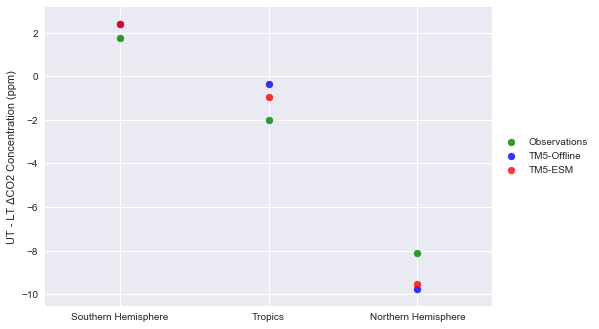

In [106]:
#7 UT-LT delta CO2 plot
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime

knmipath = '/nobackup/users/killaars/PhD_data/runs_may_2017/'
macbookpath = '/Users/killaars/PhD/runs_may_2017/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fesm_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_2007110300_2007111000.nc'):
#        if file.startswith('sample_coordinates_'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline_newmeteo',TM5_MP_filename)
            flask_esm = os.path.join(path,'TM5_ESM',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_esm_fh = nc.Dataset(flask_esm,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fesm_obs = np.append(fesm_obs,flask_esm_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_esm_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fesm_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    
temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fesm_obs': fesm_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc},index=obs_num)

#Select the timeframe to make the plots
df = df[(df.D_alt<2000) | (df.D_alt>10000)]
#Create new column, everything lower than 2000m is in the LT and the rest is in the UT
df['J_tropo'] = np.where(df['D_alt']<2000, 'LT', 'UT')

TRO = (df.E_lat>-20) & (df.E_lat<20) 
NH = (df.E_lat>20) & (df.E_lat<60)
SH = (df.E_lat>-60) & (df.E_lat<-20) 

mask = TRO
# print(df[mask]['H_obs_id'].value_counts())
# print(df[mask]['I_obs_loc'].value_counts())
# print(df[mask]['D_alt'].value_counts())

TRO_mean = df[TRO].groupby(df['J_tropo']).mean()
TRO_mean = TRO_mean[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
TRO_mean = TRO_mean.transpose()

SH_mean = df[SH].groupby(df['J_tropo']).mean()
SH_mean = SH_mean[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
SH_mean = SH_mean.transpose()

NH_mean = df[NH].groupby(df['J_tropo']).mean()
NH_mean = NH_mean[['A_fin_obs','B_fmp_obs','C_fesm_obs']]
NH_mean = NH_mean.transpose()

plot_mean = pd.DataFrame(index=('A_fin_obs','B_fmp_obs','C_fesm_obs'))
plot_mean['Southern_Hemisphere'] = SH_mean['UT']-SH_mean['LT']
plot_mean['Tropics'] = TRO_mean['UT']-TRO_mean['LT']
plot_mean['Northern_Hemisphere'] = NH_mean['UT']-NH_mean['LT']
plot_mean = plot_mean.transpose()
plot_mean = plot_mean.reset_index()
print(plot_mean)

f, (ax1) = plt.subplots(1, 1,sharey=True,sharex=True)
alpha = .8
ax1.scatter(x=plot_mean.index, y=plot_mean.A_fin_obs, color='g', alpha=alpha, label='Observations')
ax1.scatter(x=plot_mean.index, y=plot_mean.B_fmp_obs, color='b', alpha=alpha, label='TM5-Offline')
ax1.scatter(x=plot_mean.index, y=plot_mean.C_fesm_obs, color='r', alpha=alpha, label='TM5-ESM')
x = [0,1,2]
labels = ['Southern Hemisphere', 'Tropics', 'Northern Hemisphere']
plt.xticks(x, labels)
plt.xlim(-0.5,2.5)
ax1.set(xlabel='', ylabel='UT - LT ΔCO2 Concentration (ppm)')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()